In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('./deeplearning.mplstyle')
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, Dataset
from lab_utils_common import dlc
from sklearn.preprocessing import StandardScaler
from torch.utils.data import TensorDataset, DataLoader


# Loading Data

In [2]:
X = np.load('data/X.npy')
y = np.load('data/y.npy')

In [3]:
print(f'The shape of X is {X.shape}')
print(f'The shape of y is {y.shape}')

The shape of X is (5000, 400)
The shape of y is (5000, 1)


## Data Visualization

Text(0.5, 0.98, '100 images from the dataset')

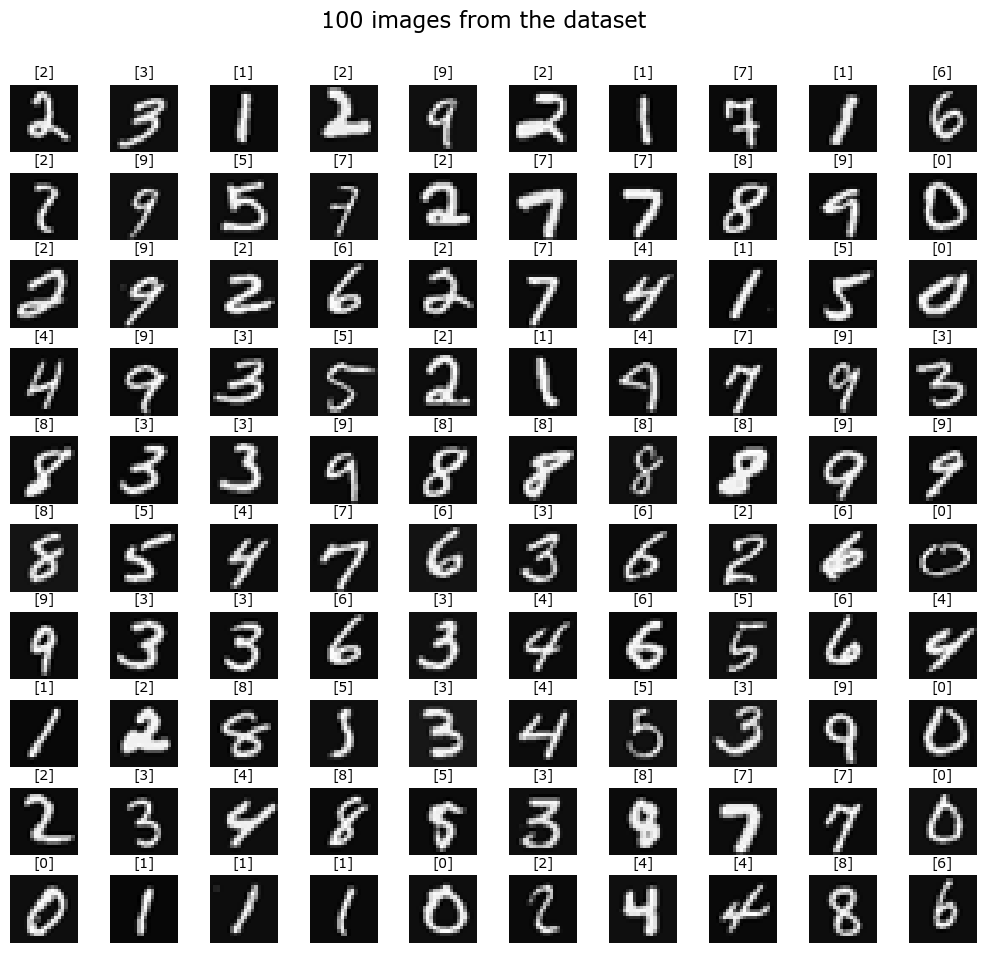

In [6]:
m, n = X.shape

fig, axes = plt.subplots(10,10, figsize = (10,10))
fig.tight_layout(pad=0.13,rect=[0, 0.03, 1, 0.91])

random_index = np.random.randint(0,m, size = 100)

for i, ax in enumerate(axes.flat):
    index = random_index[i]
    ax.imshow(X[index].reshape(20, 20).T, cmap = 'gray')
    ax.axis('off')
    ax.set_title(f'{y[index]}', fontsize = 10)

plt.suptitle('100 images from the dataset', fontsize = 16)


## Converting Data into Tensors

In [54]:
X_tensor = torch.tensor(X, dtype = torch.float32)
y_tensor = torch.tensor(y, dtype = torch.long)

y_tensor.shape
print(f"Unique labels in y_tensor: {torch.unique(y_tensor)}")
print(f"Min label in y_tensor: {torch.min(y_tensor)}")
print(f"Max label in y_tensor: {torch.max(y_tensor)}")

Unique labels in y_tensor: tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
Min label in y_tensor: 0
Max label in y_tensor: 9


# Model Class

In [55]:
class NN(nn.Module):
    def __init__(self, input_size):
        super(NN, self).__init__()
    
        self.net = nn.Sequential(
            nn.Linear(input_size, 25),
            nn.ReLU(),
            nn.Linear(25, 15),
            nn.ReLU(),
            nn.Linear(15, 10)
        )

    def forward(self, x):
        return self.net(x)

# Neural Network Model

In [56]:
model = NN(input_size = 400)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr = 0.001)

## Training Loop

In [60]:
num_epochs = 100

dataset = TensorDataset(X_tensor, y_tensor)
batch_size = 32  # To match TensorFlow's default
train_loader = DataLoader(dataset=dataset, batch_size=batch_size, shuffle=True)

for epoch in range(num_epochs):
    model.train()
    epoch_loss = 0.0
    num_batches = 0
    
    
    for batch_idx, (data_batch, target_batch) in enumerate(train_loader):
        optimizer.zero_grad()
        outputs = model(data_batch)

        ##MONITOR THIS
        target_batch = target_batch.squeeze()
        ##MONITOR THIS
        
        loss = criterion(outputs, target_batch)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
        num_batches += 1


    avg_epoch_loss = epoch_loss / num_batches

    if (epoch + 1) % 1 == 0:
        print(f'Epoch [{epoch +1}/{num_epochs}], Loss: {avg_epoch_loss:.4f}')

Epoch [1/100], Loss: 0.0018
Epoch [2/100], Loss: 0.0015
Epoch [3/100], Loss: 0.0016
Epoch [4/100], Loss: 0.0014
Epoch [5/100], Loss: 0.0013
Epoch [6/100], Loss: 0.0012
Epoch [7/100], Loss: 0.0011
Epoch [8/100], Loss: 0.0010
Epoch [9/100], Loss: 0.0010
Epoch [10/100], Loss: 0.0009
Epoch [11/100], Loss: 0.0009
Epoch [12/100], Loss: 0.0098
Epoch [13/100], Loss: 0.0296
Epoch [14/100], Loss: 0.0120
Epoch [15/100], Loss: 0.0022
Epoch [16/100], Loss: 0.0012
Epoch [17/100], Loss: 0.0010
Epoch [18/100], Loss: 0.0009
Epoch [19/100], Loss: 0.0009
Epoch [20/100], Loss: 0.0008
Epoch [21/100], Loss: 0.0008
Epoch [22/100], Loss: 0.0008
Epoch [23/100], Loss: 0.0007
Epoch [24/100], Loss: 0.0007
Epoch [25/100], Loss: 0.0007
Epoch [26/100], Loss: 0.0006
Epoch [27/100], Loss: 0.0006
Epoch [28/100], Loss: 0.0006
Epoch [29/100], Loss: 0.0006
Epoch [30/100], Loss: 0.0006
Epoch [31/100], Loss: 0.0005
Epoch [32/100], Loss: 0.0005
Epoch [33/100], Loss: 0.0005
Epoch [34/100], Loss: 0.0005
Epoch [35/100], Loss: 0

In [61]:
model.eval()

NN(
  (net): Sequential(
    (0): Linear(in_features=400, out_features=25, bias=True)
    (1): ReLU()
    (2): Linear(in_features=25, out_features=15, bias=True)
    (3): ReLU()
    (4): Linear(in_features=15, out_features=10, bias=True)
  )
)

In [62]:
with torch.no_grad():
    outputs = model(X_tensor)
    predicted_classes = torch.argmax(outputs, dim=1)
    predicted_classes = predicted_classes.cpu().numpy()

In [63]:
predicted_classes

array([0, 0, 0, ..., 9, 9, 9], dtype=int64)

Text(0.5, 0.98, 'Label, image')

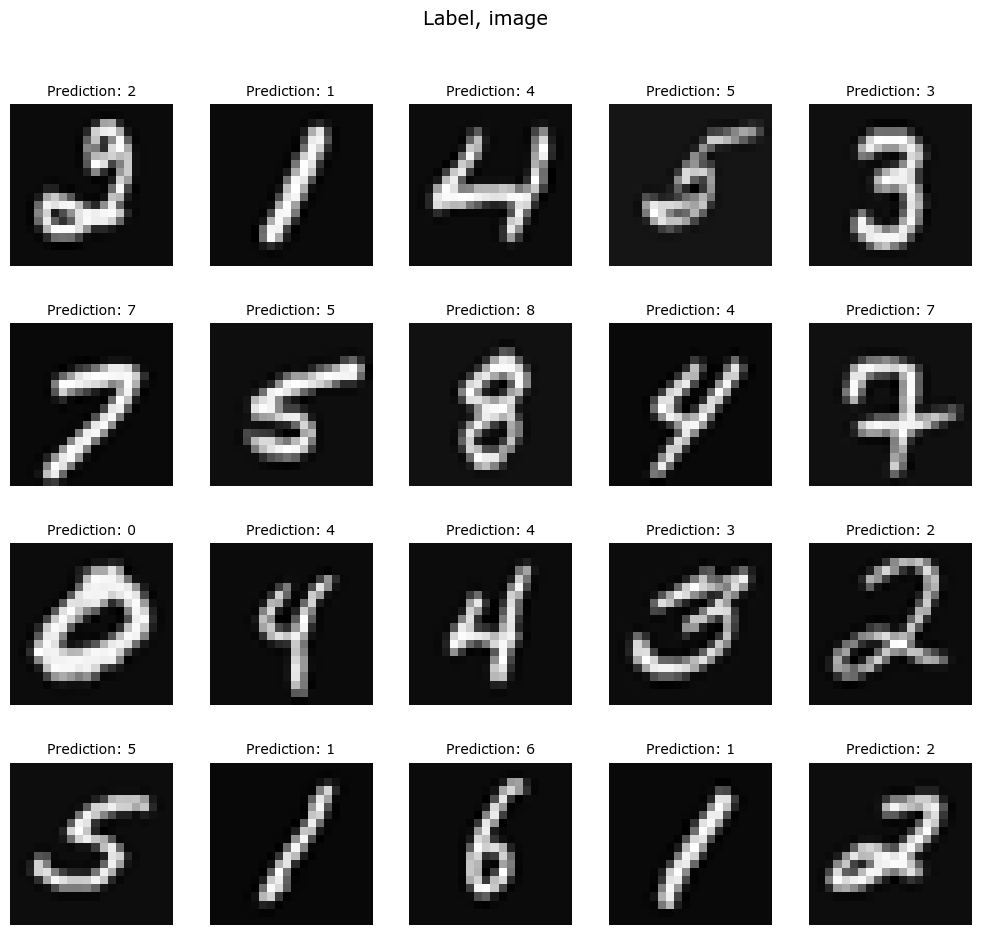

In [65]:
random_index = np.random.randint(1, m, 20)

fig, axes = plt.subplots(4,5, figsize = (10,10))
fig.tight_layout(pad=0.13,rect=[0, 0.03, 1, 0.91])

for i, ax in enumerate(axes.flat):
    index = random_index[i]
    ax.imshow(X[index].reshape(20,20).T, cmap = 'gray')
    ax.set_title(f'Prediction: {predicted_classes[index]}', fontsize = 10)
    ax.axis('off')

fig.suptitle('Label, image', fontsize = 14)


In [ ]:

wrong_pred = np.where(predicted_classes != y.squeeze())[0]
print(f'There are {len(wrong_pred)} incorrect predictions')


There are 0 incorrect predictions


(5000,)

Text(0.5, 0.98, 'Wrong Label, Image')

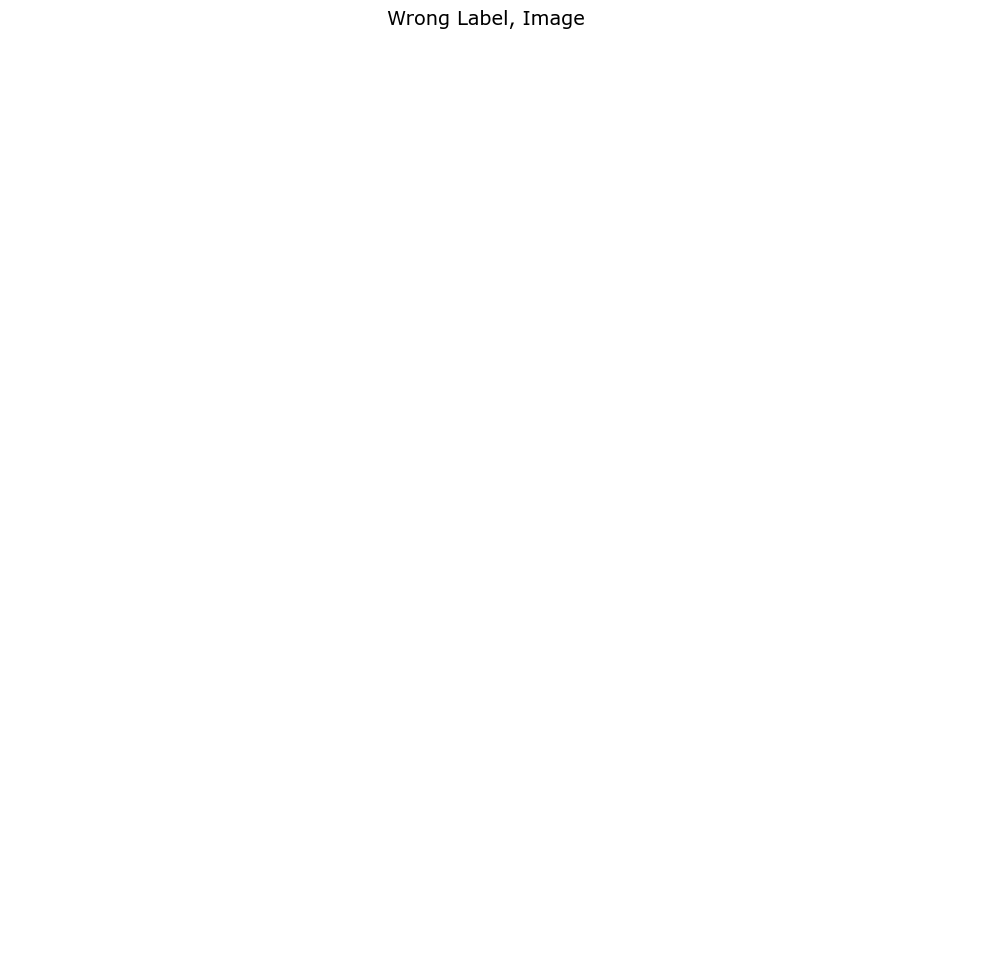

In [87]:
fig, axes = plt.subplots(4,5, figsize = (10,10))
fig.tight_layout(pad=0.13,rect=[0, 0.03, 1, 0.91])

for i, ax in enumerate(axes.flat):
    if i < len(wrong_pred):
        ax.imshow(X[wrong_pred[i]].reshape(20,20).T, cmap = 'gray')
        ax.set_title(f'Prediction: {predicted_classes[index]}', fontsize = 10)
        ax.axis('off')
    
    else:
        ax.axis('off')

fig.suptitle('Wrong Label, Image', fontsize = 14)